<a href="https://colab.research.google.com/github/JavaOliverLu/python/blob/master/AP4062_HW1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#!pip install -q keras


In [12]:
import keras
from keras.datasets import cifar10
from keras import models
from keras import layers
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()


In [3]:
from keras import regularizers

network = models.Sequential()
network.add(layers.Dense(512, activation='relu',
input_shape=(32 * 32 * 3,)))
network.add(layers.Dense(40, kernel_regularizer=regularizers.l2(0.001),
activation='sigmoid'))
network.add(layers.Dense(20, kernel_regularizer=regularizers.l2(0.001),
activation='relu'))
network.add(layers.Dense(10, activation='softmax'))


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [4]:
network.compile(optimizer='adam',
loss='categorical_crossentropy',
metrics=['accuracy'])

In [5]:
train_images = train_images.reshape((50000, 32 * 32 * 3))
train_images = train_images.astype('float32') / 255
test_images = test_images.reshape((10000, 32 * 32 * 3))
test_images = test_images.astype('float32') / 255

In [6]:
from keras.utils import to_categorical
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)


In [7]:
history =network.fit(train_images, train_labels, epochs=20, batch_size=256)

Epoch 1/20
196/196 ━━━━━━━━━━━━━━━━━━━━ 13s 55ms/step - accuracy: 0.1892 - loss: 2.2646
Epoch 2/20
196/196 ━━━━━━━━━━━━━━━━━━━━ 20s 51ms/step - accuracy: 0.3361 - loss: 1.8889
Epoch 3/20
196/196 ━━━━━━━━━━━━━━━━━━━━ 9s 47ms/step - accuracy: 0.3876 - loss: 1.7401
Epoch 4/20
196/196 ━━━━━━━━━━━━━━━━━━━━ 10s 52ms/step - accuracy: 0.4196 - loss: 1.6560
Epoch 5/20
196/196 ━━━━━━━━━━━━━━━━━━━━ 10s 52ms/step - accuracy: 0.4450 - loss: 1.5969
Epoch 6/20
196/196 ━━━━━━━━━━━━━━━━━━━━ 11s 55ms/step - accuracy: 0.4613 - loss: 1.5559
Epoch 7/20
196/196 ━━━━━━━━━━━━━━━━━━━━ 20s 53ms/step - accuracy: 0.4751 - loss: 1.5145
Epoch 8/20
196/196 ━━━━━━━━━━━━━━━━━━━━ 21s 58ms/step - accuracy: 0.4849 - loss: 1.4826
Epoch 9/20
196/196 ━━━━━━━━━━━━━━━━━━━━ 10s 52ms/step - accuracy: 0.4884 - loss: 1.4696
Epoch 10/20
196/196 ━━━━━━━━━━━━━━━━━━━━ 9s 48ms/step - accuracy: 0.5012 - loss: 1.4422
Epoch 11/20
196/196 ━━━━━━━━━━━━━━━━━━━━ 10s 51ms/step - accuracy: 0.5034 - loss: 1.4287
Epoch 12/20
196/196 ━━━━━━━━━━━━

In [8]:
test_loss, test_acc = network.evaluate(test_images, test_labels)


313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.5176 - loss: 1.4344


ADDITIONAL AREA

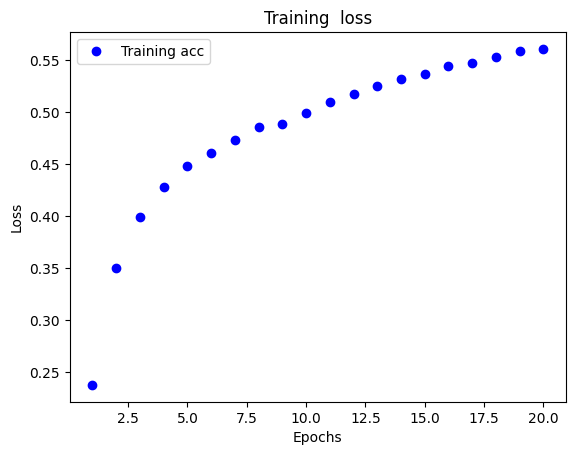

In [9]:
import matplotlib.pyplot as plt
history_dict = history.history
accuracy = history_dict['accuracy']

epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, 'bo', label='Training acc')
plt.title('Training  loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()
#show accuracy

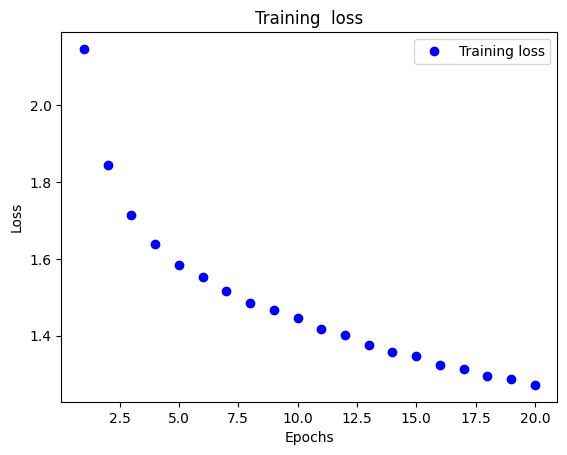

In [10]:
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict['loss']
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.title('Training  loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()
#show loss

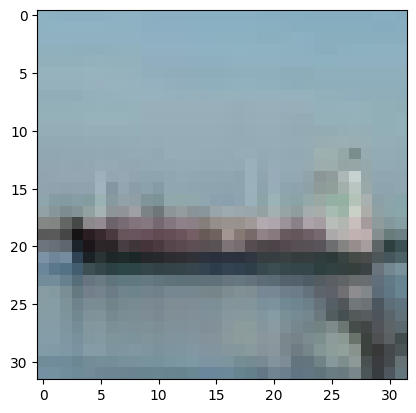

In [14]:
digit = train_images[4723]
import matplotlib.pyplot as plt
plt.imshow(digit)
#plt.show(digit)